In [2]:
import pandas as pd 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [7]:
df[df.target == 1].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [8]:
df['target_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [9]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]
l1 = set(df.target_names)
l1

{'setosa', 'versicolor', 'virginica'}

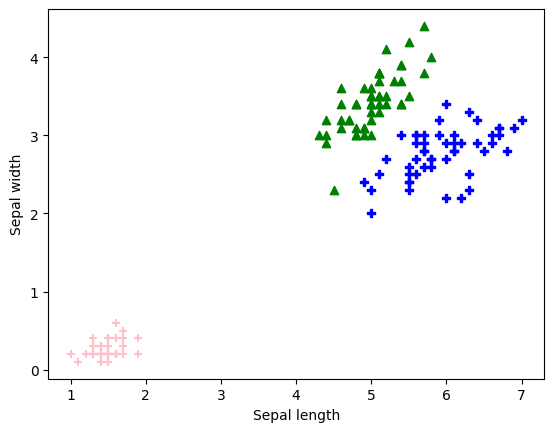

In [10]:
plt.xlabel ("Sepal length")
plt.ylabel ("Sepal width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "g" ,marker = "^")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "b" ,marker = "P")
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'pink' , marker ="+")

In [11]:
X = df.drop (['target', 'target_names'], axis = "columns")
y = df.target

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size=.75, random_state=1)

CREATING KNN CLASSIFIER

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=67) .fit(X_train, y_train)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 67,
 'p': 2,
 'weights': 'uniform'}

In [15]:
knn.score(X_test, y_test)

0.8421052631578947

In [16]:
knn.score(X_train, y_train)

0.8839285714285714

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_pred = knn.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

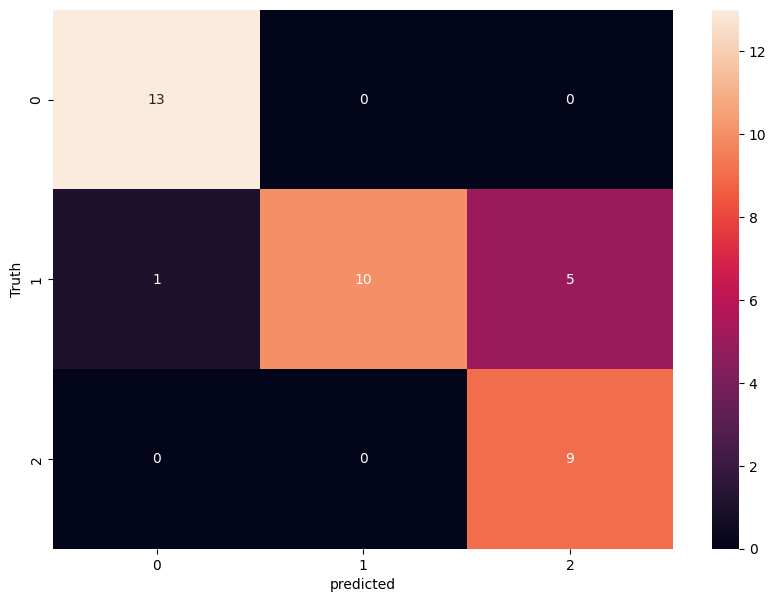

In [19]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn 
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
sn.heatmap(cm , annot=True)
plt.xlabel ('predicted')
plt.ylabel("Truth")

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.62      0.77        16
           2       0.64      1.00      0.78         9

    accuracy                           0.84        38
   macro avg       0.86      0.88      0.84        38
weighted avg       0.89      0.84      0.84        38

